In [1]:
"""
Created on Thur Oct 10 23:41:46 2019

@author: Nkosi
"""
#Load required data packages
import types
from botocore.client import Config
import ibm_boto3
import pandas as pd
import pylab as pl
import array
import re
import numpy as np
import seaborn as sb
import scipy.optimize as opt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

def __iter__(self): return 0

# read in the Fifa 19 dataset from our IBM Cloud 
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_327fe91d44b14354a9869271490d8a87 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1_UHhZ8PF-xFVnrLnYaQBuo0d7MVPMHgNY4M5d9XmMY4',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_327fe91d44b14354a9869271490d8a87.get_object(Bucket='groupproject1-donotdelete-pr-ovabdqpwwdlbt8',Key='fifadata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dfifa = pd.read_csv(body)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [2]:
#prints data types of the dfifa attributes 
print(dfifa.dtypes)

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                      

In [3]:
#Statistical analysis of data distribution
print(dfifa.describe())
#for all attributes including non-numeric
print(dfifa.describe(include="all"))
print(dfifa)

         Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031   

In [4]:
#It describes top and bottom 30 rows each for sample
dfifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [5]:
# First five rows of the dataset and the headers
dfifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
#list of columns values
dfifa.columns.values

array(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'S

In [7]:
'''
Clean up the dataset to remove columns that are not informative to us for visualization 
'''
dfifa.drop(['Unnamed: 0','ID', 'Photo','Name', 'Nationality', 'Flag','Club', 'Club Logo',
       'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy','Contract Valid Until','Height','Weight',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'], axis=1, inplace=True)


In [8]:
#list of columns values left for visualization and modelling
dfifa.columns.values

array(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Release Clause'],
      dtype=object)

In [9]:
# First five rows of the dataset and the headers after removing useless columns
dfifa.head()

,Age,Overall,Potential,Value,Wage,Release Clause
0,31,94,94,€110.5M,€565K,€226.5M
1,33,94,94,€77M,€405K,€127.1M
2,26,92,93,€118.5M,€290K,€228.1M
3,27,91,93,€72M,€260K,€138.6M
4,27,91,92,€102M,€355K,€196.4M


In [10]:
#Cleaning up the values so that we can interpret them 
#Removing extra symbols to convert the attributes to numeric values
list_val = []
for i in dfifa.Value:
    if i[-1] == 'M':
        list_val.append(float(i[1:-1])*1000000)
    elif i[-1] == 'K':
        list_val.append(float(i[1:-1])*1000)
    else:
        list_val.append(float(i[1]))
                        
dfifa.Value=list_val
dfifa.head()

,Age,Overall,Potential,Value,Wage,Release Clause
0,31,94,94,110500000.0,€565K,€226.5M
1,33,94,94,77000000.0,€405K,€127.1M
2,26,92,93,118500000.0,€290K,€228.1M
3,27,91,93,72000000.0,€260K,€138.6M
4,27,91,92,102000000.0,€355K,€196.4M


In [11]:
#Cleaning the release clauses so that we can interpret them 
#Rename Release Clause Column
dfifa.rename(columns={'Release Clause':'ReleaseClause'}, inplace=True)
dfifa['ReleaseClause']= dfifa["ReleaseClause"].astype(str)
def value_wage(df_value):
    try:
        value = float(df_value[1:-1])
        end = df_value[-1:]

        if end == 'M':
            value = value * 1000000
        elif end == 'K':
            value = value * 1000
    except ValueError:
        value = 0
        
    return value

dfifa['ReleaseClause'] = dfifa['ReleaseClause'].apply(value_wage)
dfifa.head()

,Age,Overall,Potential,Value,Wage,ReleaseClause
0,31,94,94,110500000.0,€565K,226500000.0
1,33,94,94,77000000.0,€405K,127100000.0
2,26,92,93,118500000.0,€290K,228100000.0
3,27,91,93,72000000.0,€260K,138600000.0
4,27,91,92,102000000.0,€355K,196400000.0


In [12]:
#Cleaning the wages so that we can interpret them 
list_wage = []
for i in dfifa.Wage:
    if i[-1] == 'K':
        list_wage.append(float(i[1:-1])*1000)
    else:
        list_wage.append(float(i[1]))
dfifa.Wage=list_wage
dfifa.head()

,Age,Overall,Potential,Value,Wage,ReleaseClause
0,31,94,94,110500000.0,565000.0,226500000.0
1,33,94,94,77000000.0,405000.0,127100000.0
2,26,92,93,118500000.0,290000.0,228100000.0
3,27,91,93,72000000.0,260000.0,138600000.0
4,27,91,92,102000000.0,355000.0,196400000.0


In [13]:
#For consistency, ensure that all column labels of type string.
# let's examine the types of the column labels
all(isinstance(column, str) for column in dfifa.columns)
dfifa.columns = list(map(str, dfifa.columns))
# let's check the column labels types now
all(isinstance(column, str) for column in dfifa.columns)

True

In [14]:
#see how many null objects in our data
dfifa.isnull().sum()

Age              0
Overall          0
Potential        0
Value            0
Wage             0
ReleaseClause    0
dtype: int64

In [15]:
#changing floats to numeric numbers
dfifa[["Age"]] = dfifa[["Age"]].apply(pd.to_numeric)
dfifa[["Overall"]] = dfifa[["Overall"]].apply(pd.to_numeric)
dfifa[["Potential"]] = dfifa[["Potential"]].apply(pd.to_numeric)
dfifa[["Value"]] = dfifa[["Value"]].apply(pd.to_numeric)
dfifa[["Wage"]] = dfifa[["Wage"]].apply(pd.to_numeric)
dfifa[["ReleaseClause"]] = dfifa[["ReleaseClause"]].apply(pd.to_numeric)
dfifa.head()

,Age,Overall,Potential,Value,Wage,ReleaseClause
0,31,94,94,110500000.0,565000.0,226500000.0
1,33,94,94,77000000.0,405000.0,127100000.0
2,26,92,93,118500000.0,290000.0,228100000.0
3,27,91,93,72000000.0,260000.0,138600000.0
4,27,91,92,102000000.0,355000.0,196400000.0


In [16]:
#*************************************************************************
#******************* Exploratory data analysis ***************************
#*************************************************************************
#Descrptive statistics
#describe for numeric values
dfifa.describe()

,Age,Overall,Potential,Value,Wage,ReleaseClause
count,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,1.820700e+04
mean,25.122206,66.238699,71.307299,2.410696e+06,9731.312133,4.191200e+06
std,4.669943,6.908930,6.136496,5.594933e+06,21999.290406,1.070778e+07
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,0.000000e+00
25%,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,3.920000e+05
50%,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,1.000000e+06
75%,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,3.000000e+06
max,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,2.281000e+08


In [17]:
#Pearson coefficient
pearson_coef, p_value = stat.pearsonr(dfifa['Age'], dfifa['ReleaseClause'])
print("The Pearson Correlation Coefficient for Age is", pearson_coef, " with a P-value of P =", p_value) 
pearson_coef, p_value = stat.pearsonr(dfifa['Overall'], dfifa['ReleaseClause'])
print("The Pearson Correlation Coefficient for Overall is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stat.pearsonr(dfifa['Potential'], dfifa['ReleaseClause'])
print("The Pearson Correlation Coefficient for Potential is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stat.pearsonr(dfifa['Value'], dfifa['ReleaseClause'])
print("The Pearson Correlation Coefficient for Value is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stat.pearsonr(dfifa['Wage'], dfifa['ReleaseClause'])
print("The Pearson Correlation Coefficient for Wage is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient for Age is 0.0669668055938965  with a P-value of P = 1.488624872727615e-19
The Pearson Correlation Coefficient for Overall is 0.5892001424658352  with a P-value of P = 0.0
The Pearson Correlation Coefficient for Potential is 0.5476681029948192  with a P-value of P = 0.0
The Pearson Correlation Coefficient for Value is 0.9672547689892197  with a P-value of P = 0.0
The Pearson Correlation Coefficient for Wage is 0.8201617765090338  with a P-value of P = 0.0


Text(0, 0.5, 'Number of Players')

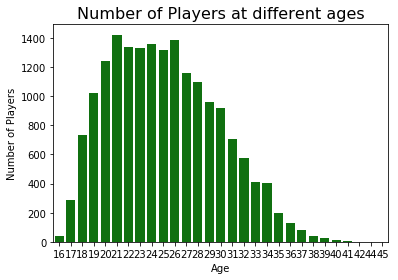

In [18]:
# Number of players at at each age group
sb.countplot(dfifa['Age'], color='g')
plt.title("Number of Players at different ages", size = 16)
plt.ylabel("Number of Players")

Text(0.5, 1.0, 'Scatterplot of Players Age and Overall')

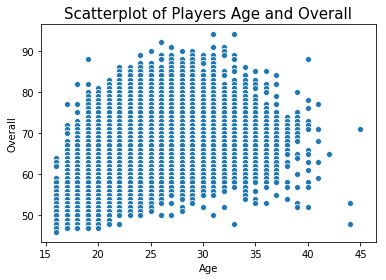

In [19]:
# Relationship between Age and Overall
sb.scatterplot(dfifa['Age'], dfifa['Overall'])
plt.title('Scatterplot of Players Age and Overall', size = 15)

Text(0.5, 1.0, 'Scatterplot of Players Age and Potential')

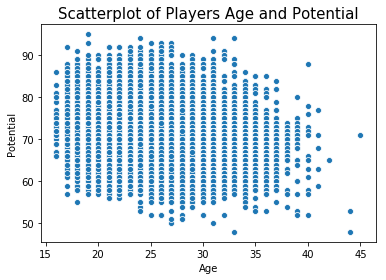

In [21]:
# Relationship between Age and Potential
sb.scatterplot(dfifa['Age'], dfifa['Potential'])
plt.title('Scatterplot of Players Age and Potential', size = 15)

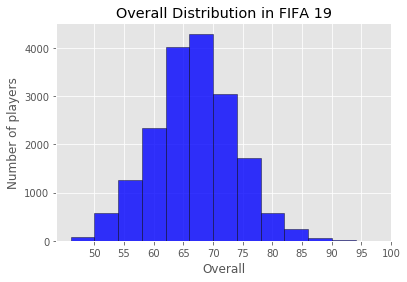

In [22]:
# Where most players are in terms of overall rating
overall = list(dfifa.loc[:,"Overall"])
with plt.style.context(('ggplot')):
    plt.hist(overall, bins=12, ec='black', alpha=0.8, color='blue')
    plt.xlabel("Overall")
    plt.ylabel("Number of players")
    plt.xticks([50,55,60,65,70,75,80,85,90,95,100])
    plt.title("Overall Distribution in FIFA 19")
    plt.show()

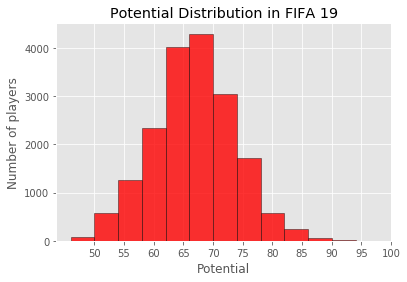

In [23]:
# Where most players are in terms of potential rating
potential = list(dfifa.loc[:,"Potential"])
with plt.style.context(('ggplot')):
    plt.hist(overall, bins=12, ec='black', alpha=0.8, color='red')
    plt.xlabel("Potential")
    plt.ylabel("Number of players")
    plt.xticks([50,55,60,65,70,75,80,85,90,95,100])
    plt.title("Potential Distribution in FIFA 19")
    plt.show()

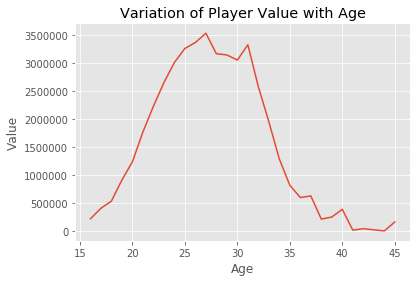

In [25]:
# Variation of Player Value with age 
valuation = dfifa.groupby(['Age']).mean()
valuation_list = list(valuation.loc[:,'Value'])
age = list(dfifa.loc[:,'Age'].unique())
age = sorted(age)
with plt.style.context('ggplot'):
    plt.plot(age,valuation_list)
    plt.title("Variation of Player Value with Age")
    plt.xlabel("Age")
    plt.ylabel("Value")
    plt.show()

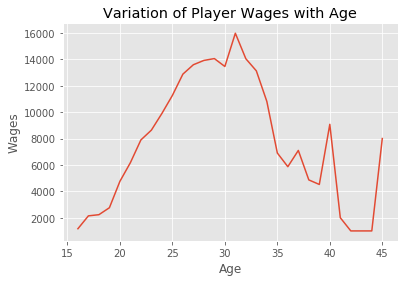

In [26]:
# Variation of wages of players and their ages
wages = dfifa.groupby(['Age']).mean()
wages_list = list(valuation.loc[:,'Wage'])
age = list(dfifa.loc[:,'Age'].unique())
age = sorted(age)
with plt.style.context('ggplot'):
    plt.plot(age,wages_list)
    plt.title("Variation of Player Wages with Age")
    plt.xlabel("Age")
    plt.ylabel("Wages")
    plt.show()

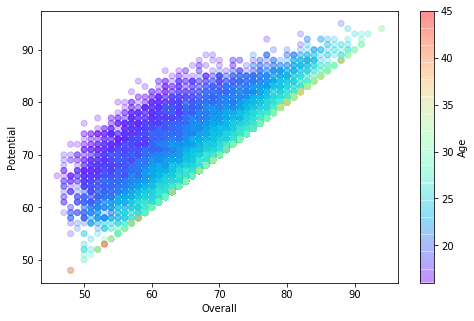

In [27]:
# Overall vs Potential vs Age
plt.figure(figsize=[8,5])
plt.scatter(x=dfifa.Overall, y=dfifa.Potential, c=dfifa.Age, alpha=0.25, cmap='rainbow' )
plt.colorbar().set_label('Age')
plt.xlabel('Overall')
plt.ylabel('Potential')
plt.show()

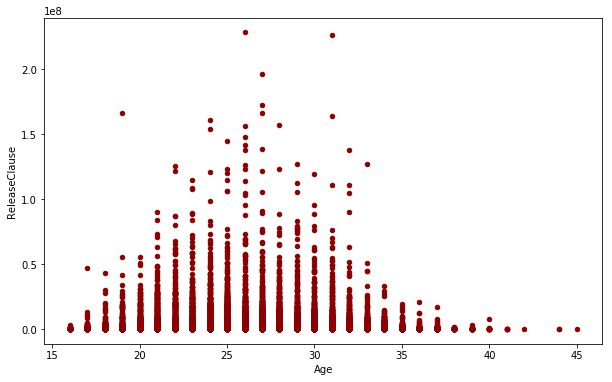

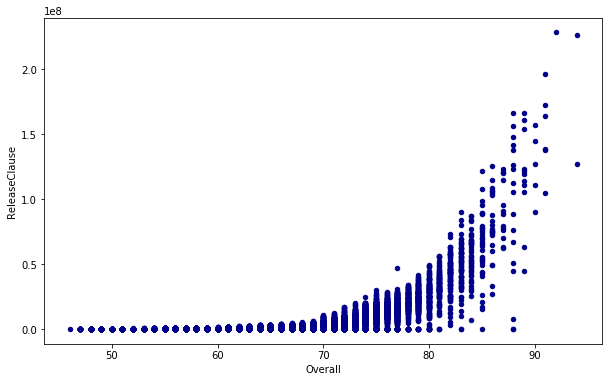

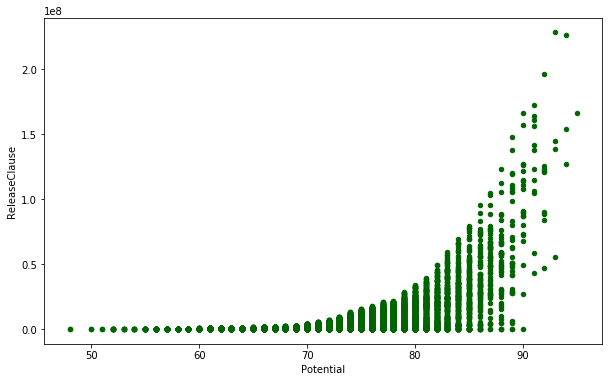

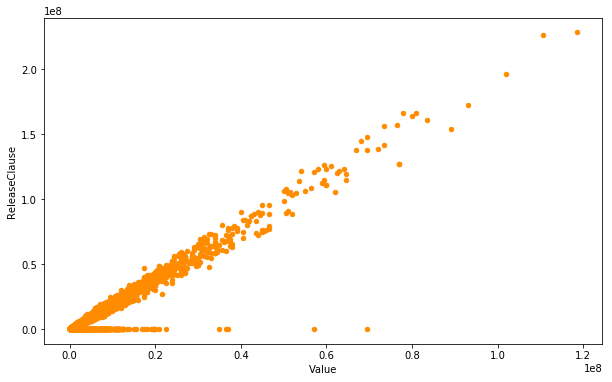

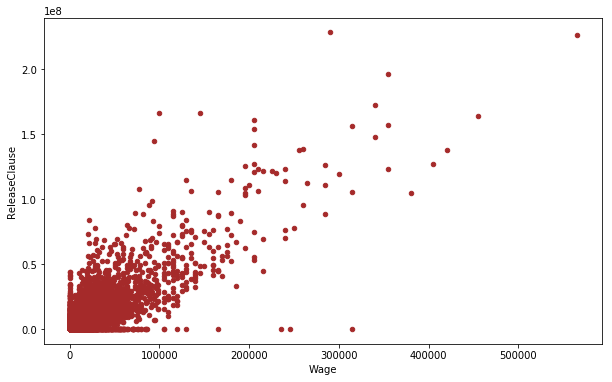

In [28]:
# Plot of Release clause against all the predictors
dfifa.plot.scatter(x='Age', y='ReleaseClause',figsize=(6, 6), color='darkred')
dfifa.plot.scatter(x='Overall', y='ReleaseClause',figsize=(6, 6), color='darkblue')
dfifa.plot.scatter(x='Potential', y='ReleaseClause',figsize=(6, 6), color='darkgreen')
dfifa.plot.scatter(x='Value', y='ReleaseClause',figsize=(6, 6), color='darkorange')
dfifa.plot.scatter(x='Wage', y='ReleaseClause',figsize=(6, 6), color='brown')

In [29]:
#After cleaning the data
dfifa.head()

,Age,Overall,Potential,Value,Wage,ReleaseClause
0,31,94,94,110500000.0,565000.0,226500000.0
1,33,94,94,77000000.0,405000.0,127100000.0
2,26,92,93,118500000.0,290000.0,228100000.0
3,27,91,93,72000000.0,260000.0,138600000.0
4,27,91,92,102000000.0,355000.0,196400000.0


In [30]:
# looking at our statistics of our data 
dfifa.describe()

,Age,Overall,Potential,Value,Wage,ReleaseClause
count,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,1.820700e+04
mean,25.122206,66.238699,71.307299,2.410696e+06,9731.312133,4.191200e+06
std,4.669943,6.908930,6.136496,5.594933e+06,21999.290406,1.070778e+07
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,0.000000e+00
25%,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,3.920000e+05
50%,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,1.000000e+06
75%,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,3.000000e+06
max,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,2.281000e+08


In [31]:
# Look at how many rows and columns we have now
print ('data dimensions:', dfifa.shape)
print(dfifa.columns)

data dimensions: (18207, 6)
Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'ReleaseClause'], dtype='object')


In [32]:
#*************************************************************************
#******************* Model building ***************************
#*************************************************************************
#importing linear model from scikit
lm=LinearRegression()
#prepare variables for model, making sure all variables are read as data frames (2D array) rather 1D
x=dfifa[['Value']]
x1=dfifa[['Wage']]
x2=dfifa[['Age']]
x3=dfifa[['Overall']]
x4=dfifa[['Potential']]
y=dfifa['ReleaseClause']
#Model fitting
lm.fit(x,y)
#prediction
yhat=lm.predict(x)
print(yhat)
#intercept
print("Intercept=",lm.intercept_)
print("Slope=",lm.coef_)

[ 2.04282486e+08  1.42268412e+08  2.19091818e+08 ... -1.60329680e+05
 -1.60329680e+05 -1.60329680e+05]
Intercept= -271399.66342490725
Slope= [1.85116639]


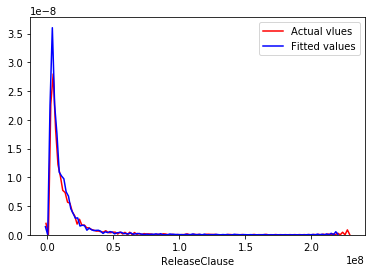

In [33]:
#Distribution plot
ax1=sb.distplot(dfifa['ReleaseClause'],hist=False,color="r",label="Actual vlues")
sb.distplot(yhat,hist=False,color='b',label="Fitted values",ax=ax1)

In [34]:
#Evaluating model using simple linear regression with each variable
lm2=LinearRegression()
lm2.fit(x,y)
R=lm2.score(x,y)
print("R Square=",R, "for the Value Predictor")
lm3=LinearRegression()
lm3.fit(x1,y)
R=lm3.score(x1,y)
print("R Square=",R, "for the Wage Predictor")
lm4=LinearRegression()
lm4.fit(x2,y)
R=lm4.score(x2,y)
print("R Square=",R, "for the Age Predictor")
lm5=LinearRegression()
lm5.fit(x3,y)
R=lm5.score(x3,y)
print("R Square=",R, "for the Overall Predictor")
lm6=LinearRegression()
lm6.fit(x4,y)
R=lm6.score(x4,y)
print("R Square=",R, "for the Potential Predictor")

R Square= 0.9355817881323887 for the Value Predictor
R Square= 0.672665339646454 for the Wage Predictor
R Square= 0.004484553051450457 for the Age Predictor
R Square= 0.3471568078817602 for the Overall Predictor
R Square= 0.2999403510379433 for the Potential Predictor


In [38]:
#Normalize the data attributes .
from sklearn import preprocessing

#separate the data from the target attributes
x = dfifa.values # returns numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dfifa=pd.DataFrame(x_scaled, columns=dfifa.columns) #keeps column names

In [40]:
#Train and testdataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (14565, 6) (14565,)
Test set: (3642, 6) (3642,)


In [41]:
# Multiple linear regression with ReleaseCLause as the predictor
z=dfifa[['Age', 'Overall', 'Potential', 'Value', 'Wage']]
lm.fit(z,dfifa['ReleaseClause'])
yhatm=lm.predict(z)
print(yhatm)
print("MLR Intercept=",lm.intercept_)
print("MLR Slope=",lm.coef_)

[0.89286502 0.61976285 0.98326439 ... 0.00293631 0.003034   0.00314391]
MLR Intercept= 4.056118574617337e-05
MLR Slope= [ 0.00713804 -0.01709003  0.00697672  1.01428435 -0.04641534]


In [42]:
#Evaluating model
#MSE
MSE=mean_squared_error(dfifa['ReleaseClause'],yhatm)
print("MSE=",MSE)
#R square
lm2=LinearRegression()
lm2.fit(z,y)
R=lm2.score(z,y)
print("R Square=",R)

MSE= 0.00013979905859920616
R Square= 0.9365575730852347


In [43]:
# Just looking at the most significant predictors in the model
a=dfifa[['Value', 'Wage']]
lm.fit(a,dfifa['ReleaseClause'])
yhatn=lm.predict(a)
print(yhatn)
print("MLR Intercept=",lm.intercept_)
print("MLR Slope=",lm.coef_)

[ 8.79874748e-01  6.11873256e-01  9.69711954e-01 ... -6.37164687e-04
 -6.37164687e-04 -6.37164687e-04]
MLR Intercept= -0.0010583157310218479
MLR Slope= [ 0.99469259 -0.04660729]


In [44]:
#Evaluating model
#MSE
MSE=mean_squared_error(dfifa['ReleaseClause'],yhatn)
print("MSE=",MSE)
#R square
lm3=LinearRegression()
lm3.fit(a,y)
R=lm3.score(a,y)
print("R Square=",R)

MSE= 0.0001410829169645994
R Square= 0.9359749433355675
